In [ ]:
from pynq import Overlay
from math import log

In [ ]:
ol = Overlay('reconf_fft2.bit')

In [ ]:
ol?

In [ ]:
data_dma = ol.fft_block.data_dma
config_dma = ol.fft_block.config_dma

In [ ]:
data_send = data_dma.sendchannel
data_recv = data_dma.recvchannel
conf_send = config_dma.sendchannel

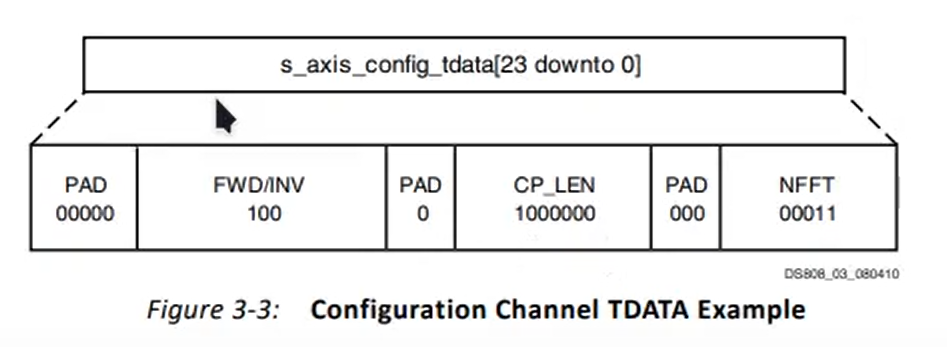

In [ ]:
def convert_to_data(fft_direction, size):
    fft_direction.zfill(8)
    byte2 = '0' * 8
    x = int(log(size,2))
    fft_size = bin(x)[2:]
    
    fft_size.zfill(8)
    tdata = fft_direction + byte2 + fft_size
    return int(tdata, 2)
# return tdata

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
SAMPLES = 8192

In [ ]:
time_interval = 1
def create_data(SAMPLES, time_interval):
    A1 = random.uniform(100,1000)
    A2 = random.uniform(100,1000)
    A3 = random.uniform(100,1000)
    f1 = random.uniform(100,150)
    f2 = random.uniform(200,300)
    f3 = random.uniform(500,600)
    w1 = 2 * np.pi * f1
    w2 = 2 * np.pi * f2
    w3 = 2 * np.pi * f3
    t = np.linspace(0, time_interval, SAMPLES)
    data = A1 * np.sin(w1 * t, dtype = np.csingle) + A2 * np.sin(w2 * t, dtype = np.csingle) + A3 * np.sin(w3 * t, dtype = np.csingle)
    return data, t 

In [ ]:
data, t = create_data(SAMPLES, time_interval)
plt.plot(t, np.real(data))

In [ ]:
%%time
output = np.fft.fft(data)

In [ ]:
freq = np.fft.fftfreq(SAMPLES * time_interval, 1/SAMPLES)

In [ ]:
plt.plot(freq, np.abs(output))

In [ ]:
from pynq import allocate

In [ ]:
input_buffer = allocate(SAMPLES, np.csingle)
output_buffer = allocate(SAMPLES, np.csingle)
np.copyto(input_buffer, data)

In [ ]:
plt.plot(np.real(input_buffer))

In [ ]:
%%time
data_send.transfer(input_buffer)
data_recv.transfer(output_buffer)
data_send.wait()
data_recv.wait()

In [ ]:
output_buffer

In [ ]:
plt.plot(freq, np.abs(output_buffer))

In [ ]:
SAMPLES = 1024
data, t = create_data(SAMPLES, time_interval)

In [ ]:
conf_buffer = allocate(1, np.uint32)
conf_buffer[0] = convert_to_data('1', SAMPLES)

In [ ]:
conf_send.transfer(conf_buffer)
conf_send.wait()

In [ ]:
input_buffer1 = allocate(SAMPLES, np.csingle)
output_buffer1 = allocate(SAMPLES, np.csingle)
np.copyto(input_buffer1, data)

In [ ]:
data_send.transfer(input_buffer1)
data_recv.transfer(output_buffer1)
data_send.wait()
data_recv.wait()

In [ ]:
data_recv.transfer(output_buffer1)

In [ ]:
plt.plot(np.abs(output_buffer1))

In [ ]:
plt.plot(np.abs(np.fft.fft(data)))